<a href="https://colab.research.google.com/github/k87rte/MNIST_DL/blob/main/MNIST_DL_play.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Use tensorflow to make DL-models for predicting handwritten numbers from the MNIST dataset

In [21]:
import tensorflow as tf
import tensorflow.keras as keras
from keras.datasets import mnist
from keras import Sequential, layers
from keras.layers import Flatten, Dense, Conv2D, MaxPool2D
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

the shape of MNIST X = (70000, 28, 28)
the shape of MNIST y = (70000,)
****************************


Text(0.5, 0.98, 'handwritten numbers')

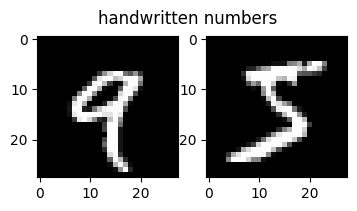

In [22]:
(trainX, trainy),(testX, testy) = mnist.load_data()
X = np.concatenate((trainX, testX),axis = 0)
y = np.concatenate((trainy, testy), axis = 0)
print(f'the shape of MNIST X = {X.shape}')
print(f'the shape of MNIST y = {y.shape}')
print('****************************')
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(4,2))
ax1.imshow(X[4,:,:], cmap='gray')
ax2.imshow(X[0,:,:], cmap='gray')
fig.suptitle('handwritten numbers')

In [23]:
rS = 42
trainX, testX, trainy, testy = train_test_split(X,y,
                                                random_state=rS,
                                                shuffle=True,
                                                train_size=.8)
print(f'shape of trainX is {trainX.shape} for random state {rS}')
print(f'shape of testX is {testX.shape} for random state {rS}')


# the pixel intensities are 0-255. bringing it
# between 0-1 will help in reaching the best params faster.

trainX_norm = trainX/255
testX_norm = testX/255
trainy_onehot = to_categorical(trainy)
testy_onehot = to_categorical(testy)

# search and remove images with NAN
print(f'does train images have nan: {np.isnan(trainX_norm).any()}')
print(f'does test images have nan: {np.isnan(testX_norm).any()}')
print(f'does train labels have nan: {np.isnan(trainy).any()}')
print(f'does test labels have nan: {np.isnan(testy).any()}')

shape of trainX is (56000, 28, 28) for random state 42
shape of testX is (14000, 28, 28) for random state 42
does train images have nan: False
does test images have nan: False
does train labels have nan: False
does test labels have nan: False


In [16]:
from keras.engine import input_spec
# build a fully connected dense neural network
model_fc = Sequential()
model_fc.add(Flatten(name='flatten_in'))
model_fc.add(Dense(64, activation='relu', name='layer1'))
model_fc.add(Dense(32, activation='relu', name='layer2'))
model_fc.add(Dense(16, activation='relu', name='layer3'))
model_fc.add(Dense(10, activation='softmax', name='finalLayer'))

model_fc.compile(
                 optimizer=keras.optimizers.Adam(learning_rate=0.001),
                 loss=keras.losses.CategoricalCrossentropy(),
                 metrics=[keras.metrics.CategoricalAccuracy()],
                 )
model_fc.build((None, 28*28))
model_fc.summary()

history = model_fc.fit(trainX_norm,
             trainy_onehot,
             epochs=30,
             batch_size=32,
             validation_data=(testX_norm, testy_onehot))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_in (Flatten)        (None, 784)               0         
                                                                 
 layer1 (Dense)              (None, 64)                50240     
                                                                 
 layer2 (Dense)              (None, 32)                2080      
                                                                 
 layer3 (Dense)              (None, 16)                528       
                                                                 
 finalLayer (Dense)          (None, 10)                170       
                                                                 
Total params: 53,018
Trainable params: 53,018
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
1750/1750 [============================

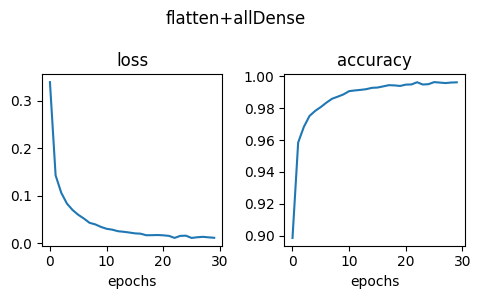

In [20]:
loss = history.history['loss']
accuracy = history.history['categorical_accuracy']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(5,3))
ax1.plot(loss)
ax2.plot(accuracy)
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
fig.suptitle('flatten+allDense')
plt.tight_layout()
plt.savefig('performance_model1.jpeg',dpi=600)

In [29]:
# build a CNN and check model performance
import keras
model_cnn = Sequential()
model_cnn.add(Conv2D(32, (3,3), padding='same', activation='relu', input_shape=(28,28,1)))
model_cnn.add(MaxPool2D())
model_cnn.add(Flatten())
model_cnn.add(Dense(32, activation='relu'))
model_cnn.add(Dense(10, activation='softmax'))

#model_cnn.build(None, (28,28,1))
model_cnn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  loss=keras.losses.CategoricalCrossentropy(),
                  metrics=[keras.metrics.CategoricalAccuracy()])

history_cnn = model_cnn.fit(trainX_norm,
             trainy_onehot,
             epochs=10,
             batch_size=32,
             validation_data=(testX_norm, testy_onehot))

Epoch 1/10
1750/1750 [==============================] - 39s 22ms/step - loss: 0.1953 - categorical_accuracy: 0.9426 - val_loss: 0.0924 - val_categorical_accuracy: 0.9721
Epoch 2/10
1750/1750 [==============================] - 40s 23ms/step - loss: 0.0686 - categorical_accuracy: 0.9795 - val_loss: 0.0754 - val_categorical_accuracy: 0.9771
Epoch 3/10
1750/1750 [==============================] - 41s 23ms/step - loss: 0.0496 - categorical_accuracy: 0.9851 - val_loss: 0.0713 - val_categorical_accuracy: 0.9776
Epoch 4/10
1750/1750 [==============================] - 40s 23ms/step - loss: 0.0370 - categorical_accuracy: 0.9889 - val_loss: 0.0642 - val_categorical_accuracy: 0.9809
Epoch 5/10
1750/1750 [==============================] - 38s 22ms/step - loss: 0.0295 - categorical_accuracy: 0.9908 - val_loss: 0.0547 - val_categorical_accuracy: 0.9831
Epoch 6/10
1750/1750 [==============================] - 38s 22ms/step - loss: 0.0227 - categorical_accuracy: 0.9931 - val_loss: 0.0605 - val_categoric

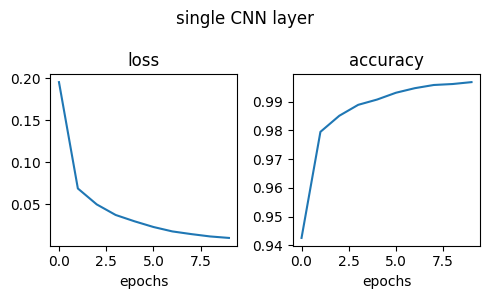

In [30]:
loss = history_cnn.history['loss']
accuracy = history_cnn.history['categorical_accuracy']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(5,3))
ax1.plot(loss)
ax2.plot(accuracy)
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
fig.suptitle('single CNN layer')
plt.tight_layout()
plt.savefig('performance_model2.jpeg',dpi=600)

In [42]:
# make a hierarchial CNN model
model_cnn_hierarchy = Sequential()
model_cnn_hierarchy.add(Conv2D(32, (3,3), activation='relu', padding='same',input_shape=(28,28,1)))
model_cnn_hierarchy.add(MaxPool2D())
model_cnn_hierarchy.add(Conv2D(16, (3,3), activation='relu', padding='same'))
model_cnn_hierarchy.add(MaxPool2D())
model_cnn_hierarchy.add(Flatten())
model_cnn_hierarchy.add(Dense(32, activation='relu'))
model_cnn_hierarchy.add(Dense(10, activation='softmax'))


model_cnn_hierarchy.summary()

model_cnn_hierarchy.compile(optimizer=keras.optimizers.Adam(0.001),
                          loss=keras.losses.CategoricalCrossentropy(),
                          metrics=[keras.metrics.CategoricalAccuracy()])

history_cnn_hierarchy = model_cnn_hierarchy.fit(trainX_norm,
                                                trainy_onehot,
                                                epochs=10,
                                                batch_size=32,
                                                validation_data=(testX_norm, testy_onehot))

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 14, 14, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_27 (Conv2D)          (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 7, 7, 16)         0         
 g2D)                                                            
                                                                 
 flatten_5 (Flatten)         (None, 784)               0         
                                                                 
 dense_30 (Dense)            (None, 32)              

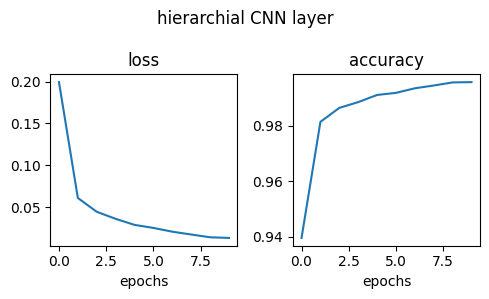

In [43]:
loss = history_cnn_hierarchy.history['loss']
accuracy = history_cnn_hierarchy.history['categorical_accuracy']
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(5,3))
ax1.plot(loss)
ax2.plot(accuracy)
ax1.set_title('loss')
ax1.set_xlabel('epochs')
ax2.set_title('accuracy')
ax2.set_xlabel('epochs')
fig.suptitle('hierarchial CNN layer')
plt.tight_layout()
plt.savefig('performance_model3.jpeg',dpi=600)

In [57]:
!pip install scikeras

In [65]:
# CNN model with some hyperparameter tuning
from sklearn.model_selection import GridSearchCV, KFold
from scikeras.wrappers import KerasClassifier

# make model as a function
def create_model():
  model_test_hyperparameter = Sequential()
  model_test_hyperparameter.add(Conv2D(32, kernel_size=(3,3),activation='relu',padding='same', input_shape=(28,28,1)))
  model_test_hyperparameter.add(MaxPool2D())
  model_test_hyperparameter.add(Flatten())
  model_test_hyperparameter.add(Dense(32, activation='relu'))
  model_test_hyperparameter.add(Dense(10, 'softmax'))

  model_test_hyperparameter.compile(optimizer=keras.optimizers.Adam(0.001),
                                    loss=keras.losses.CategoricalCrossentropy(),
                                    metrics=[keras.metrics.CategoricalAccuracy()])

  return model_test_hyperparameter

model = KerasClassifier(build_fn=create_model, epochs = 2, verbose=1)
p_grid = {
          'batch_size':[64,128]
}

cv = KFold(5, shuffle=True, random_state=rS)
clf = GridSearchCV(estimator=model,
                   param_grid=p_grid,
                   cv=cv)

gridRes = clf.fit(trainX_norm, trainy_onehot)

/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
700/700 [==============================] - 25s 35ms/step - loss: 0.2785 - categorical_accuracy: 0.9180
Epoch 2/2
175/175 [==============================] - 3s 19ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
700/700 [==============================] - 24s 34ms/step - loss: 0.2640 - categorical_accuracy: 0.9235
Epoch 2/2
175/175 [==============================] - 3s 15ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
700/700 [==============================] - 24s 33ms/step - loss: 0.2826 - categorical_accuracy: 0.9176
Epoch 2/2
175/175 [==============================] - 2s 13ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
700/700 [==============================] - 24s 33ms/step - loss: 0.2929 - categorical_accuracy: 0.9157
Epoch 2/2
175/175 [==============================] - 2s 11ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
700/700 [==============================] - 24s 34ms/step - loss: 0.2832 - categorical_accuracy: 0.9182
Epoch 2/2
175/175 [==============================] - 2s 11ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
350/350 [==============================] - 23s 65ms/step - loss: 0.3550 - categorical_accuracy: 0.8997
Epoch 2/2
88/88 [==============================] - 2s 19ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
350/350 [==============================] - 23s 65ms/step - loss: 0.3651 - categorical_accuracy: 0.8963
Epoch 2/2
88/88 [==============================] - 2s 19ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
350/350 [==============================] - 23s 65ms/step - loss: 0.3558 - categorical_accuracy: 0.9000
Epoch 2/2
88/88 [==============================] - 2s 19ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
350/350 [==============================] - 22s 62ms/step - loss: 0.3833 - categorical_accuracy: 0.8946
Epoch 2/2
88/88 [==============================] - 2s 19ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
350/350 [==============================] - 23s 64ms/step - loss: 0.3741 - categorical_accuracy: 0.8940
Epoch 2/2
88/88 [==============================] - 2s 19ms/step


/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/2
875/875 [==============================] - 31s 35ms/step - loss: 0.2323 - categorical_accuracy: 0.9326
Epoch 2/2
875/875 [==============================] - 31s 35ms/step - loss: 0.0752 - categorical_accuracy: 0.9774


In [67]:
gridRes.best_estimator_

KerasClassifier(
	model=None
	build_fn=<function create_model at 0x7fa0c8633f40>
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=64
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=2
	class_weight=None
)